In [257]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split 


In [258]:
with open('headers.txt') as f:
    lines = f.readlines()

for i in range(len(lines)):
    lines[i] = lines[i].split(" ")

headers = [lines[i][1] for i in range(len(lines))]

# preprocess data
raw = pd.read_csv('communities.data', names=headers)

# replace ? with np.nan
raw = raw.replace('?', np.nan)


In [259]:
# what influences police department payroll

#delete dependent and non numeric columns
to_delete = ['county', 'community', 'state', 'communityname', 'PolicOperBudg', 
             'numbUrban', 'LemasTotalReq','LemasSwFTFieldOps', 'LemasSwornFT', 'PolicBudgPerPop']

X = raw.drop(columns=to_delete)
y = raw.PolicBudgPerPop.astype(float).dropna()

X = X.dropna()
X = X.astype(float)

data = X.copy()
data['PolicBudgPerPop'] = y



In [260]:
#regression over all the variables we kept

X = sm.add_constant(X)
regressor = sm.OLS(y, X)
model = regressor.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        PolicBudgPerPop   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     18.12
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           8.22e-66
Time:                        19:44:14   Log-Likelihood:                 515.36
No. Observations:                 319   AIC:                            -792.7
Df Residuals:                     200   BIC:                            -344.7
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9521      0.419      2.270      0.024       0.125       1.779
fold                     -0.0006      0.001     -0.421      0.674      -0.003       0.002
population               -0.1547      0.100     -1.550      0.123      -0.351       0.042
householdsize             0.0294      0.240      0.123      0.903      -0.444       0.503
racepctblack              0.0907      0.082      1.111      0.268      -0.070       0.252
racePctWhite              0.0895      0.116      0.772      0.441      -0.139       0.318
racePctAsian             -0.0569      0.055     -1.027      0.306      -0.166       0.052
racePctHisp               0.0074      0.082      0.091      0.928      -0.153       0.168
agePct12t21              -0.1326      0.237     -0.559      0.577      -0.600       0.335
agePct12t29              -0.3530      0.306     -1.154      0.250      -0.956       0.250
agePct16t24               0.0520      0.355      0.147      0.883      -0.647       0.751
agePct65up               -0.3737      0.230     -1.624      0.106      -0.827       0.080
pctUrban                 -0.0644      0.061     -1.053      0.293      -0.185       0.056
medIncome                -0.6433      0.341     -1.886      0.061      -1.316       0.029
pctWWage                  0.1323      0.220      0.600      0.549      -0.302       0.567
pctWFarmSelf              0.0454      0.059      0.770      0.442      -0.071       0.161
pctWInvInc                0.1834      0.118      1.554      0.122      -0.049       0.416
pctWSocSec               -0.1104      0.226     -0.489      0.625      -0.555       0.335
pctWPubAsst               0.1102      0.085      1.293      0.197      -0.058       0.278
pctWRetire               -0.0358      0.076     -0.469      0.639      -0.186       0.115
medFamInc                 0.3500      0.257      1.362      0.175      -0.157       0.857
perCapInc                 0.1047      0.275      0.381      0.704      -0.437       0.646
whitePerCap              -0.0710      0.168     -0.423      0.673      -0.402       0.260
blackPerCap              -0.0619      0.091     -0.682      0.496      -0.241       0.117
indianPerCap              0.0961      0.047      2.044      0.042       0.003       0.189
AsianPerCap               0.0268      0.050      0.535      0.593      -0.072       0.125
OtherPerCap               0.0957      0.051      1.890      0.060      -0.004       0.196
HispPerCap               -0.0612      0.058     -1.057      0.292      -0.175       0.053
NumUnderPov               0.1426      0.124      1.149      0.252      -0.102       0.387
PctPopUnderPov           -0.1494      0.146     -1.024      0.307      -0.437       0.138
PctLess9thGrade           0.0041      0.127      0.032      0.975      -0.246       0.254
PctNotHSGrad           

In [261]:
#correlation heatmap

#plt.figure(figsize=(12,10))
cor = data.corr()
#sns.heatmap(cor, xticklabels=3, yticklabels=3)
#plt.show()

In [262]:
# find features with a correlation > 0.5 with PolicBudgPerPop

good = cor[abs(cor.PolicPerPop) > 0.2]
X = X[good.index.drop('PolicBudgPerPop')]

X.columns
print(X.corr())

# highly correlated columns
# householdsize-PersPerOccupHous-PersPerOwnOccHous
#racepctblack-PctIlleg
#agePct65up-pctWWage-pctWSocSec
#pctWWage-PctEmploy
#PctFam2Par-PctKids2Par-PctYoungKids2Par-PctTeen2Par-PctIlleg
#LemasSwFTPerPop-LemasSwFTFieldPerPop-PolicPerPop
#OfficAssgnDrugUnits-PolicCars

# keep one of each group
drop = ['PersPerOccupHous', 'PersPerOwnOccHous', 'racepctblack',
        'pctWWage', 'pctWSocSec', 'PctFam2Par', 'PctKids2Par',
        'PctYoungKids2Par', 'PctTeen2Par', 'LemasSwFTPerPop', 'LemasSwFTFieldPerPop', 'OfficAssgnDrugUnits',
        'racePctAsian', 'AsianPerCap']
X = X.drop(columns=drop)

                      householdsize  racepctblack  racePctAsian  agePct65up  \
householdsize              1.000000      0.017372      0.214026   -0.554712   
racepctblack               0.017372      1.000000     -0.274948   -0.027305   
racePctAsian               0.214026     -0.274948      1.000000   -0.298533   
agePct65up                -0.554712     -0.027305     -0.298533    1.000000   
pctUrban                  -0.005684     -0.011595      0.051122    0.013323   
pctWWage                   0.332010     -0.265668      0.344951   -0.788999   
pctWSocSec                -0.353319      0.095696     -0.412747    0.930098   
AsianPerCap               -0.142422     -0.147770      0.045624    0.192180   
PctEmploy                  0.012627     -0.363409      0.323311   -0.561565   
PctFam2Par                 0.114287     -0.761027      0.272221   -0.112065   
PctKids2Par                0.030152     -0.788211      0.262919   -0.090659   
PctYoungKids2Par           0.060052     -0.712776   

In [263]:
# run regression with new feature set
regressor = sm.OLS(y, X)
model = regressor.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        PolicBudgPerPop   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              302.2
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                   4.88e-153
Time:                        19:44:14   Log-Likelihood:                          362.34
No. Observations:                 319   AIC:                                     -704.7
Df Residuals:                     309   BIC:                                     -667.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
householdsize           0.0097      0.039      0.252      0.801      -0.066       0.086
agePct65up             -0.0187      0.046     -0.404      0.686      -0.110       0.072
pctUrban               -0.0584      0.042     -1.376      0.170      -0.142       0.025
PctEmploy               0.0409      0.043      0.947      0.344      -0.044       0.126
PctIlleg               -0.0578      0.019     -2.970      0.003      -0.096      -0.020
PctHousOccup            0.0804      0.030      2.645      0.009       0.021       0.140
LemasTotReqPerPop       0.1398      0.037      3.788      0.000       0.067       0.212
PolicPerPop             0.8269      0.041     20.159      0.000       0.746       0.908
PolicCars               0.0424      0.023      1.833      0.068      -0.003       0.088
LemasPctPolicOnPatr    -0.0110      0.022     -0.493      0.622      -0.055       0.033
==============================================================================
Omnibus:                      232.807   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6594.033
Skew:                           2.588   Prob(JB):                         0.00
Kurtosis:                      24.664   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
Fs = []
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    Fs += [model.fvalue]
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
print(Fs)

# from this we find ['PctIlleg', 'PctHousOccup', 'LemasTotReqPerPop', 'PolicPerPop', 'PolicCars']
# are significant features

['PctIlleg', 'PctHousOccup', 'LemasTotReqPerPop', 'PolicPerPop', 'PolicCars']
[107.65625357207466, 119.98499652720146, 135.39245878744606, 155.16630769165056, 181.06972870217075, 215.1876121947671]


In [265]:
# F statistic as we reduce features

In [266]:
# run regression with only significant features
X = X[['PctIlleg', 'PctHousOccup', 'LemasTotReqPerPop', 'PolicPerPop', 'PolicCars']]

regressor = sm.OLS(y, X)
model = regressor.fit()
Fs += [model.fvalue]
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        PolicBudgPerPop   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              590.6
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                   2.54e-157
Time:                        19:44:14   Log-Likelihood:                          356.67
No. Observations:                 319   AIC:                                     -703.3
Df Residuals:                     314   BIC:                                     -684.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PctIlleg             -0.0781      0.016     -4.848      0.000      -0.110      -0.046
PctHousOccup          0.0341      0.011      2.968      0.003       0.011       0.057
LemasTotReqPerPop     0.1187      0.036      3.318      0.001       0.048       0.189
PolicPerPop           0.8160      0.036     22.691      0.000       0.745       0.887
PolicCars             0.0395      0.023      1.747      0.082      -0.005       0.084
==============================================================================
Omnibus:                      226.863   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5910.896
Skew:                           2.519   Prob(JB):                         0.00
Kurtosis:                      23.478   Cond. No.                         9.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

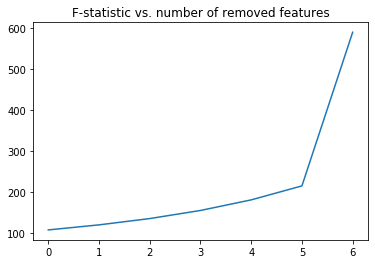

In [267]:
# plot fstats
plt.plot(range(len(Fs)), Fs)
plt.title('F-statistic vs. number of removed features')
plt.show()

In [268]:
# test accuracy of model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
regressor = sm.OLS(y_train, X_train)
model = regressor.fit()
#model.summary()

#predictions = model.predict(X_test)

Text(0.5, 1.0, 'PolicCars')

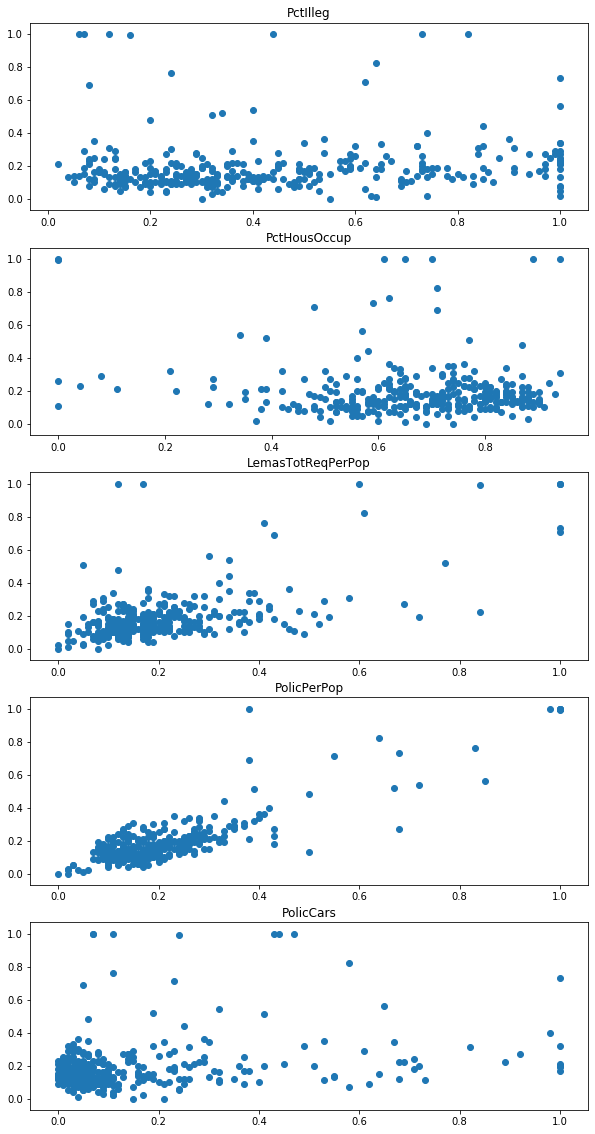

In [269]:
# check assumptions
ig, axs = plt.subplots(5, 1, figsize=(10, 20))
axs[0].scatter(X[['PctIlleg']], y)
axs[0].set_title('PctIlleg')

axs[1].scatter(X[['PctHousOccup']], y)
axs[1].set_title('PctHousOccup')

axs[2].scatter(X[['LemasTotReqPerPop']], y)
axs[2].set_title('LemasTotReqPerPop')

axs[3].scatter(X[['PolicPerPop']], y)
axs[3].set_title('PolicPerPop')

axs[4].scatter(X[['PolicCars']], y)
axs[4].set_title('PolicCars')

# Not associated with PctIlleg or PctHousOccup

In [270]:
X = X.drop(columns=['PctIlleg', 'PctHousOccup'])

regressor = sm.OLS(y, X)
model = regressor.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        PolicBudgPerPop   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              912.8
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                   2.87e-155
Time:                        19:44:19   Log-Likelihood:                          344.93
No. Observations:                 319   AIC:                                     -683.9
Df Residuals:                     316   BIC:                                     -672.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LemasTotReqPerPop     0.0998      0.036      2.780      0.006       0.029       0.170
PolicPerPop           0.8001      0.035     22.979      0.000       0.732       0.869
PolicCars             0.0112      0.022      0.499      0.618      -0.033       0.055
==============================================================================
Omnibus:                      185.205   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3295.264
Skew:                           1.988   Prob(JB):                         0.00
Kurtosis:                      18.235   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
# police cars is no longer significant
X = X.drop(columns=['PolicCars'])

regressor = sm.OLS(y, X)
model = regressor.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        PolicBudgPerPop   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1372.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                   7.78e-157
Time:                        19:44:19   Log-Likelihood:                          344.80
No. Observations:                 319   AIC:                                     -685.6
Df Residuals:                     317   BIC:                                     -678.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LemasTotReqPerPop     0.1050      0.034      3.054      0.002       0.037       0.173
PolicPerPop           0.8023      0.034     23.267      0.000       0.734       0.870
==============================================================================
Omnibus:                      183.306   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3230.503
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      18.088   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

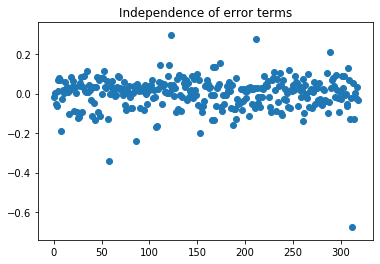

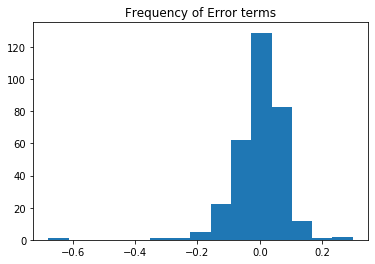

In [272]:
# more assumptions!
# plotting error terms
errors = model.predict(X) - y

plt.scatter(range(len(errors)), errors)
plt.title('Independence of error terms')
plt.show()

#independent and homodesiastic!

plt.hist(errors, bins=15)

plt.title('Frequency of Error terms')
plt.show()
